# 데이터 로드

In [1]:
import chardet
import pandas as pd

pd.set_option('display.max_columns', None)

with open('final.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

data = pd.read_csv('final.csv', encoding=encoding)
df = data

print(df.columns)

Index(['화재발생일시', '화재발생_연', '화재발생_월', '화재발생_일', '주말여부', '화재발생시간대', '시군구명',
       '읍면동명', '발화지점', '날씨', '온도', '습도', '특보내용', '발화원인종합', '소방서명', '서센터명',
       '소방지역대명', '출동소요시간', '현장소방서거리', '현장안전센터거리', '현장소방지역대거리', '전체인력수합계',
       '화재진압시간', '동원장비수', '인명피해수', '재산피해금액', '피해면적'],
      dtype='object')


# 데이터 전처리 (추가)

## 월, 일 데이터도 추가적으로 분류 진행

In [2]:
def map_day_to_period(day):
    if day <= 10:
        return '월초'
    elif day <= 20:
        return '월중순'
    else:
        return '월말'

df['한달내의 시기'] = df['화재발생_일'].apply(map_day_to_period)

In [3]:
def map_month_to_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['계절'] = df['화재발생_월'].apply(map_month_to_season)
df

,화재발생일시,화재발생_연,화재발생_월,화재발생_일,주말여부,화재발생시간대,시군구명,읍면동명,발화지점,날씨,온도,습도,특보내용,발화원인종합,소방서명,서센터명,소방지역대명,출동소요시간,현장소방서거리,현장안전센터거리,현장소방지역대거리,전체인력수합계,화재진압시간,동원장비수,인명피해수,재산피해금액,피해면적,한달내의 시기,계절
0,2011-01-22 23:35:00,2011,1,22,1,21~24,강릉시,죽헌동,산정상,맑음,-1,30,NaN,방화 및 방화의심,강릉소방서,경포119안전센터,NaN,1700,9,9,0.0,37,1800,8,0,0,0.30,월말,겨울
1,2011-01-31 18:13:00,2011,1,31,0,18~21,양양군,현남면,산아래,맑음,1,10,건조경보,인간의 부주의,양양소방서,하조대119안전센터,NaN,1615,43,13,0.0,1872,155952,71,0,184330,30.00,월말,겨울
2,2011-02-11 17:50:00,2011,2,11,0,15~18,홍천군,내촌면,산중턱,구름많음,-2,29,NaN,인간의 부주의,홍천소방서,서석119안전센터,내촌119지역대,2240,37,37,7.0,171,20500,9,0,4864,0.30,월중순,겨울
3,2011-02-12 06:18:00,2011,2,12,1,3~6,원주시,귀래면,산중턱,구름많음,-6,44,NaN,인간의 부주의,원주소방서,흥업119안전센터,귀래119지역대,2019,20,20,8.0,94,35009,9,0,50,0.30,월중순,겨울
4,2011-02-26 16:42:00,2011,2,26,1,15~18,원주시,태장동,산정상,맑음,14,23,NaN,인간의 부주의,원주소방서,태장119안전센터,NaN,508,8,2,0.0,46,3825,8,0,440,0.03,월말,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2021-05-09 13:43:01,2021,5,9,1,12~15,철원군,철원읍,산중턱,맑음,19,26,NaN,인간의 부주의,철원소방서,동송119안전센터,NaN,801,16,7,0.0,60,2915,12,0,0,0.03,월초,봄
535,2021-05-09 17:44:49,2021,5,9,1,15~18,철원군,철원읍,산정상,맑음,18,22,NaN,인간의 부주의,철원소방서,동송119안전센터,NaN,347,12,1,0.0,67,4529,13,0,0,0.01,월초,봄
536,2021-05-13 15:37:05,2021,5,13,0,15~18,태백시,하사미동,산중턱,맑음,23,43,NaN,기계/전기/화학 요인,태백소방서,화전119안전센터,NaN,2121,20,17,0.0,144,43459,18,0,0,1.20,월중순,봄
537,2021-06-07 15:11:39,2021,6,7,0,15~18,강릉시,주문진읍,산중턱,맑음,25,62,NaN,인간의 부주의,강릉소방서,주문진119안전센터,NaN,1344,21,6,0.0,50,12539,11,0,223,0.01,월초,여름


In [4]:
def merge_reasons(row):
    if row['특보내용'] == '건조경보' or row['특보내용'] == '건조주의보' :
        return '특보_건조'
    
    elif row['특보내용'] == '강풍경보' or row['특보내용'] == '강풍주의보' :
        return '특보_강풍'
    elif row['특보내용'] == '풍랑경보' or row['특보내용'] == '풍랑주의보' :
        return '특보_풍랑'
    elif row['특보내용'] == '한파경보' or row['특보내용'] == '한파주의보' :
        return '특보_한파'
    elif row['특보내용'] == '대설주의보' :
        return '특보_대설'
    
df['특보내용'] = df.apply(merge_reasons, axis=1)

In [5]:
df = df.drop(['화재발생_월','화재발생_일','현장소방지역대거리','화재발생일시','화재발생_연','읍면동명','소방서명','서센터명','소방지역대명','인명피해수','재산피해금액'],axis=1)

df

,주말여부,화재발생시간대,시군구명,발화지점,날씨,온도,습도,특보내용,발화원인종합,출동소요시간,현장소방서거리,현장안전센터거리,전체인력수합계,화재진압시간,동원장비수,피해면적,한달내의 시기,계절
0,1,21~24,강릉시,산정상,맑음,-1,30,None,방화 및 방화의심,1700,9,9,37,1800,8,0.30,월말,겨울
1,0,18~21,양양군,산아래,맑음,1,10,특보_건조,인간의 부주의,1615,43,13,1872,155952,71,30.00,월말,겨울
2,0,15~18,홍천군,산중턱,구름많음,-2,29,None,인간의 부주의,2240,37,37,171,20500,9,0.30,월중순,겨울
3,1,3~6,원주시,산중턱,구름많음,-6,44,None,인간의 부주의,2019,20,20,94,35009,9,0.30,월중순,겨울
4,1,15~18,원주시,산정상,맑음,14,23,None,인간의 부주의,508,8,2,46,3825,8,0.03,월말,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,12~15,철원군,산중턱,맑음,19,26,None,인간의 부주의,801,16,7,60,2915,12,0.03,월초,봄
535,1,15~18,철원군,산정상,맑음,18,22,None,인간의 부주의,347,12,1,67,4529,13,0.01,월초,봄
536,0,15~18,태백시,산중턱,맑음,23,43,None,기계/전기/화학 요인,2121,20,17,144,43459,18,1.20,월중순,봄
537,0,15~18,강릉시,산중턱,맑음,25,62,None,인간의 부주의,1344,21,6,50,12539,11,0.01,월초,여름


## 최종 데이터셋 완성

In [6]:
df = df.reindex(columns=['한달내의 시기', '계절', '주말여부', '화재발생시간대', '시군구명', '발화지점', '날씨', '온도', '습도', '특보내용',
       '발화원인종합', '출동소요시간', '현장소방서거리', '현장안전센터거리', '전체인력수합계', '화재진압시간', '동원장비수',
       '피해면적'])
df

,한달내의 시기,계절,주말여부,화재발생시간대,시군구명,발화지점,날씨,온도,습도,특보내용,발화원인종합,출동소요시간,현장소방서거리,현장안전센터거리,전체인력수합계,화재진압시간,동원장비수,피해면적
0,월말,겨울,1,21~24,강릉시,산정상,맑음,-1,30,None,방화 및 방화의심,1700,9,9,37,1800,8,0.30
1,월말,겨울,0,18~21,양양군,산아래,맑음,1,10,특보_건조,인간의 부주의,1615,43,13,1872,155952,71,30.00
2,월중순,겨울,0,15~18,홍천군,산중턱,구름많음,-2,29,None,인간의 부주의,2240,37,37,171,20500,9,0.30
3,월중순,겨울,1,3~6,원주시,산중턱,구름많음,-6,44,None,인간의 부주의,2019,20,20,94,35009,9,0.30
4,월말,겨울,1,15~18,원주시,산정상,맑음,14,23,None,인간의 부주의,508,8,2,46,3825,8,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,월초,봄,1,12~15,철원군,산중턱,맑음,19,26,None,인간의 부주의,801,16,7,60,2915,12,0.03
535,월초,봄,1,15~18,철원군,산정상,맑음,18,22,None,인간의 부주의,347,12,1,67,4529,13,0.01
536,월중순,봄,0,15~18,태백시,산중턱,맑음,23,43,None,기계/전기/화학 요인,2121,20,17,144,43459,18,1.20
537,월초,여름,0,15~18,강릉시,산중턱,맑음,25,62,None,인간의 부주의,1344,21,6,50,12539,11,0.01


# target 분리 및 tast, train 데이터 분리

In [7]:
data = df
#Feature 와 target 나누기
features = data[data.columns[:-1]]
target = data[data.columns[-1]]

In [8]:
features = pd.get_dummies(data = features, columns = ['한달내의 시기'], prefix = '한달내의 시기')
features = pd.get_dummies(data = features, columns = ['계절'], prefix = '계절')
features = pd.get_dummies(data = features, columns = ['화재발생시간대'], prefix = '화재발생시간대')
features = pd.get_dummies(data = features, columns = ['시군구명'], prefix = '시군구명')
features = pd.get_dummies(data = features, columns = ['발화지점'], prefix = '발화지점')
features = pd.get_dummies(data = features, columns = ['날씨'], prefix = '날씨')
features = pd.get_dummies(data = features, columns = ['발화원인종합'], prefix = '발화원인종합')
features = pd.get_dummies(data = features, columns = ['특보내용'], prefix = '특보내용')

### 위의 과정 이후 중간에 Decision Tree Regressor 모델을 이용해 성능평가를 진행했으나<br><br> 모델의 설득력도 없고 RMSE 값도 매우 크게 나와 feature에 대한 추가적인 처리 진행

In [9]:
features = features.drop(['전체 인력수합계','동원장비수'],axis=1)

### 전체 입력수 합계와 동원장비수로만 트리가 만들어지기 때문에 해당 피처 삭제 후 분석 재진행

In [10]:
print("컬럼 목록:", data.columns)

컬럼 목록: Index(['한달내의 시기', '계절', '주말여부', '화재발생시간대', '시군구명', '발화지점', '날씨', '온도', '습도',
       '특보내용', '발화원인종합', '출동소요시간', '현장소방서거리', '현장안전센터거리', '전체인력수합계', '화재진압시간',
       '동원장비수', '피해면적'],
      dtype='object')


In [11]:
features

,주말여부,온도,습도,출동소요시간,현장소방서거리,현장안전센터거리,화재진압시간,한달내의 시기_월말,한달내의 시기_월중순,한달내의 시기_월초,계절_가을,계절_겨울,계절_봄,계절_여름,화재발생시간대_0~3,화재발생시간대_12~15,화재발생시간대_15~18,화재발생시간대_18~21,화재발생시간대_21~24,화재발생시간대_3~6,화재발생시간대_6~9,화재발생시간대_9~12,시군구명_강릉시,시군구명_고성군,시군구명_동해시,시군구명_삼척시,시군구명_속초시,시군구명_양구군,시군구명_양양군,시군구명_영월군,시군구명_원주시,시군구명_인제군,시군구명_정선군,시군구명_철원군,시군구명_춘천시,시군구명_태백시,시군구명_평창군,시군구명_홍천군,시군구명_화천군,시군구명_횡성군,발화지점_미상,발화지점_산아래,발화지점_산정상,발화지점_산중턱,발화지점_평지,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_비,날씨_소나기,날씨_흐림,발화원인종합_기계/전기/화학 요인,발화원인종합_미상,발화원인종합_방화 및 방화의심,발화원인종합_인간의 부주의,발화원인종합_자연적 요인,특보내용_특보_강풍,특보내용_특보_건조,특보내용_특보_대설,특보내용_특보_풍랑,특보내용_특보_한파
0,1,-1,30,1700,9,9,1800,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,1,10,1615,43,13,155952,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False
2,0,-2,29,2240,37,37,20500,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,1,-6,44,2019,20,20,35009,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,14,23,508,8,2,3825,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,19,26,801,16,7,2915,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
535,1,18,22,347,12,1,4529,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
536,0,23,43,2121,20,17,43459,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
537,0,25,62,1344,21,6,12539,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2,random_state = 22)

In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (431, 61)
y_train shape: (431,)


In [14]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (108, 61)
y_test shape: (108,)


# Decision Tree Regressor 활용한 분석

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(random_state=22)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=22)

In [16]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

# 2차 모델 성능 확인

In [18]:
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

RMSE on training set: 3.854583273971444e-18
RMSE on test set: 41.15607509946244


In [19]:
# R² 점수 계산
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: -1.5103336885265297


# GridSearchCV를 활용하여 최적의 파라미터 확인

In [20]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=22)

param_grid = {
    'max_depth': [2, 3, 4, 5, 7, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 7, 12, 14, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# GridSearchCV 수행
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score:  3559.974601380943


In [21]:
model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=22)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                      random_state=22)

In [22]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

# 3차 모델 성능 확인

In [23]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

RMSE on training set: 31.314576800277415
RMSE on test set: 23.067408607717528


In [24]:
# R² 점수 계산
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: 0.21139201618798997


## 현재까지 가장 높은 R² Score값과 가장 작은 test 셋에 대한 RMSE 값 산출

### 기타 추가적인 영향력으로 인하여 성능이 낮게 나오는 것으로 파악됨

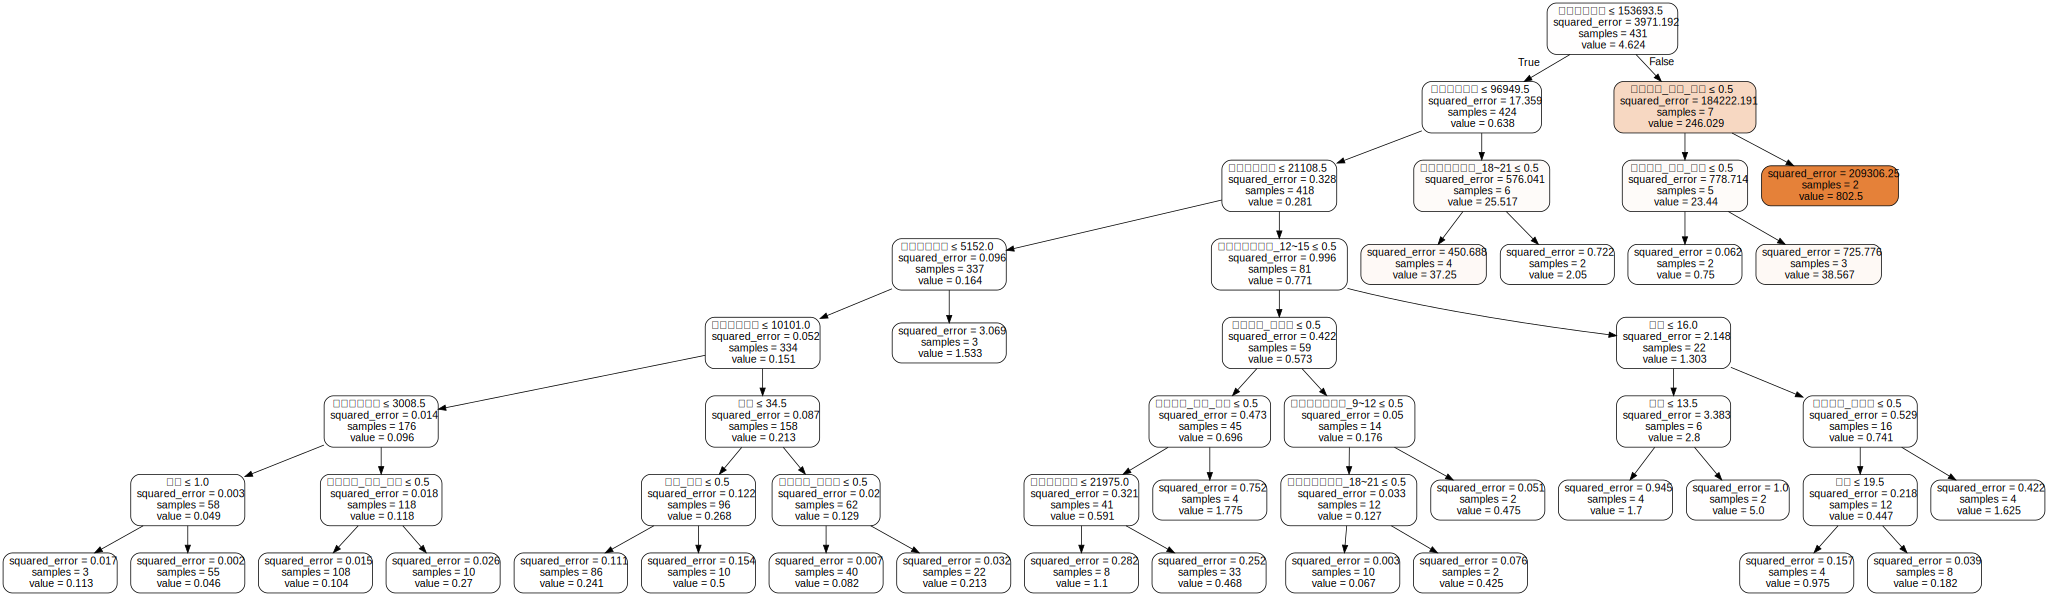

In [25]:
#tree 시각화
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("tree", format='png')  
graph